# ESP (Ensemble Streamflow Prediction) Simulation

We have completed model calibration and validation using module A. Model calibration and validation. Now, we are going to generate ESP ensemble scenario using multiple observed weather datasets and run the Tank model.

ESP (Day, 1985) is a widely used operational forecasting method that forecast flow using the current hydrological conditions and forced into the forecast period with an ensemble of historical meteorological sequences (Baker et al., 2021). The concep of ESP can be simply repesented by the figure below;
</b>

<br>

<div>
<img src="./util/images/ESP.jpg", width="700"/>
</div>
<br>

## 1. Import libraries
Now, we need to import the necessary libraries and tools (🚨 in order to run the code like in the box below, place the mouse pointer in the cell, then click on “run cell” button above or press shift + enter).

In [19]:
import os, re
import pandas as pd
from pandas import Series, DataFrame
import numpy as np
import matplotlib.pylab as plt
from matplotlib import font_manager, rc
import matplotlib.dates as mdates
import datetime
import calendar
from datetime import date
from dateutil.relativedelta import relativedelta

## 2. Settings

In [3]:
# Assign working directory and time series data
path = os.getcwd()
# Input simulation information
catchment_name = 'A'                   # Define the catchment name
ratio = {'A':0.23, 'B':0.605}          # Ratio of Loss/PET which is defined manually (see hydrologic_data.xlsx)
area = {'A':2073.0, 'B':1584.0}        # Catchment area (square kilometer)
sim_title = catchment_name + '_esp'    # Simulation title
loss_et_ratio = ratio[catchment_name]  # Call the ET loss ratio defined above for the catchment
catch_area =  area[catchment_name]     # Call the catchment area defined above for the catchment

# model warm up start year (model will start to run from this year Janurary first)
warmup_year = 2009

# Define ESP simulation start and end year/month/day
start_year = 2011
start_month = 1
start_day = 1
start_date = str(start_month).zfill(2) + '/' + str(start_day).zfill(2) + '/' + str(start_year)
end_year = 2020
end_month = 12
end_day = 31
end_date = str(end_month).zfill(2) + '/' + str(end_day).zfill(2) + '/' + str(end_year)

## 3. Parameter assimilation

Here we assimilate the parameters using already calibrated results.

In [4]:
# Initial conditions (7)
XSI      =  240.0
XAI      =  0.0
XBI      =  0.0
XCI      =  10.0
XDI      =  500.0
S1       =  40.0
S2       =  250.0
# Assign the estimated parameters (21) from calibration
parameter = pd.read_csv(path + '/analysis/1.parameter/' + catchment_name + '_parameter.csv')
K1       = parameter['value'][0]
K2       = parameter['value'][1]
A2       = parameter['value'][2]
A1       = parameter['value'][3]
A0       = parameter['value'][4]
B1       = parameter['value'][5]
B0       = parameter['value'][6]
C1       = parameter['value'][7]
C0       = parameter['value'][8]
D1       = parameter['value'][9]
HA2      = parameter['value'][10]
HA1      = parameter['value'][11]
HB       = parameter['value'][12]
HC       = parameter['value'][13]
U1       = parameter['value'][14]
U2       = parameter['value'][15]
SNOSTOR0 = parameter['value'][16]
T_RAIN   = parameter['value'][17]
T_SNOW   = parameter['value'][18]
MELTMAX  = parameter['value'][19]
ALPHA    = parameter['value'][20]

## 4. Tank model input file genetration (ESP)

### 4.1. Create basic input files

Now, we generate input file for the ESP simulation with Tank model. These basic input files have information regarding the simulation of Tank model such as simulation title, period, parameters and observed data from the beginning of warm up year to simulation starting month.

In [5]:
for year in range(start_year, end_year+1):
    for month in range(start_month, end_month+1):
        # define the path and name of the input file
        file = open(path + '/analysis/3.ESP/1_input/' + catchment_name + '_' + str(year) + '_' + str(month).zfill(2) + '.txt', "w")
        # simulation start date which is defined as the first of Janurary in warmup_year
        start_date = str(1).zfill(2) + '/' + str(1).zfill(2) + '/' + str(warmup_year)
        date_start = datetime.datetime(year, month, 1)
        date_end   = date_start + relativedelta(months=+7)
        sim_end   = datetime.datetime(date_end.year, date_end.month, 1) - datetime.timedelta(days=1)
        end_date = str(sim_end.month).zfill(2) + '/' + str(sim_end.day).zfill(2) + '/' + str(sim_end.year)
        
        # allocate simulation information such as title, catchment etc.
        file.write(str(sim_title).rjust(10) + "\n")
        file.write(str(catchment_name).rjust(20) + "\n")
        file.write(str(start_date).rjust(10) + str(end_date).rjust(20) + "\n")
        file.write(str(loss_et_ratio).rjust(10) + str(0.0).rjust(10) + "\n")
        file.write(str(catch_area).rjust(10) + "\n")
        
        # allocate initial parameters defined in 3. Parameter assimilation
        file.write(str(XSI).rjust(20) + str('XSI').rjust(10) + str(SNOSTOR0).rjust(20) + str('SNOSTOR0').rjust(10) + "\n")
        file.write(str(XAI).rjust(20) + str('XAI').rjust(10) + str(T_RAIN).rjust(20) + str('T_RAIN').rjust(10) + "\n")
        file.write(str(XBI).rjust(20) + str('XBI').rjust(10) + str(T_SNOW).rjust(20) + str('T_SNOW').rjust(10) + "\n")
        file.write(str(XCI).rjust(20) + str('XCI').rjust(10) + str(MELTMAX).rjust(20) + str('MELTMAX').rjust(10) + "\n")
        file.write(str(XDI).rjust(20) + str('XDI').rjust(10) + str(ALPHA).rjust(20) + str('ALPHA').rjust(10) + "\n")
        file.write(str(S1).rjust(20) + str('S1').rjust(10) + "\n")
        file.write(str(S2).rjust(20) + str('S2').rjust(10) + "\n")
        file.write(str(K1).rjust(20) + str('K1').rjust(10) + "\n")
        file.write(str(K2).rjust(20) + str('K2').rjust(10) + "\n")
        file.write(str(A2).rjust(20) + str('A2').rjust(10) + "\n")
        file.write(str(A1).rjust(20) + str('A1').rjust(10) + "\n")
        file.write(str(A0).rjust(20) + str('A0').rjust(10) + "\n")
        file.write(str(B1).rjust(20) + str('B1').rjust(10) + "\n")
        file.write(str(B0).rjust(20) + str('B0').rjust(10) + "\n")
        file.write(str(C1).rjust(20) + str('C1').rjust(10) + "\n")
        file.write(str(C0).rjust(20) + str('C0').rjust(10) + "\n")
        file.write(str(D1).rjust(20) + str('D1').rjust(10) + "\n")
        file.write(str(HA2).rjust(20) + str('HA2').rjust(10) + "\n")
        file.write(str(HA1).rjust(20) + str('HA1').rjust(10) + "\n")
        file.write(str(HB).rjust(20) + str('HB').rjust(10) + "\n")
        file.write(str(HC).rjust(20) + str('HC').rjust(10) + "\n")
        file.write(str(U1).rjust(20) + str('U1').rjust(10) + "\n")
        file.write(str(U2).rjust(20) + str('U2').rjust(10) + "\n")
        
        # call the time series data (csv)        
        data = pd.read_csv(path + '/data/' + catchment_name + '_hydrologic_data.csv', skipfooter = 0)  # read input data (daily rain, temp, evapotranspiration)
        
        # allocate the time series data (date, rainfall, flow, ET and temperature) to the input file
        date = list(data['date'])
        rain = list(data['rain'])
        obs_flow = list(data['obs_flow'])
        ET = list(data['et'])
        temp = list(data['temp'])
        
        # define start and end rows        
        endrow_date = datetime.datetime(year, month, 1) - datetime.timedelta(days=1)
        start_row = data.index[data['date'] == str(2009) + '-' + str(1).zfill(2) + '-' + str(1).zfill(2)].tolist()[0]
        end_row   = data.index[data['date'] == str(endrow_date.year) + '-' + str(endrow_date.month).zfill(2) + '-' + str(endrow_date.day).zfill(2)].tolist()[0]
        for index in range(start_row, end_row+1):
                file.write(str(date[index]).rjust(10) + str(rain[index]).rjust(10) + str(obs_flow[index]).rjust(10)  + str(ET[index]).rjust(10) + str(temp[index]).rjust(10) + "\n")
        file.close()

print('Basic input file for ESP has generated!')

Basic input file for ESP has generated!


### 4.2. Generation of ESP ensemble data using historical data

Create hydrological ensemble of precipitation, temperature, ET and observed flow data. Hydrological data of each catchment is shown in /data/ folder. We generate this ensemble scenario for every month with multiple historical observations.

In [6]:
past_start_year = 1966     # Define the start year of the historical data for ESP

for year in range(past_start_year, start_year):
    for month in range(start_month, end_month+1):
        
        # create new txt file
        file = open(path + '/analysis/3.ESP/2_ensemble/' + catchment_name + '_' + str(year) + '_' + str(month).zfill(2) + '.txt', "w")
        
        # call the historical hydrologic data
        data = pd.read_csv(path + '/data/' + catchment_name + '_hydrologic_data.csv', skipfooter = 0)  # read input data (daily rain, temp, evapotranspiration)
        
        # allocate the data for each year and month
        date = list(data['date'])
        rain = list(data['rain'])
        obs_inflow = list(data['obs_flow'])
        ET = list(data['et'])
        temp = list(data['temp'])
        
        # define the start and end row of the historical data
        start_row = data.index[data['date'] == str(year) + '-' + str(month).zfill(2) + '-' + str(1).zfill(2)].tolist()[0]
        endrow_date = datetime.datetime(year, month, 1) + relativedelta(months=+7)
        end_row   = data.index[data['date'] == str(endrow_date.year) + '-' + str(endrow_date.month).zfill(2) + '-' 
                               + str(endrow_date.day).zfill(2)].tolist()[0]
        for index in range(start_row, end_row+1):
                file.write(str(date[index]).rjust(10) + str(rain[index]).rjust(10) + str(ET[index]).rjust(20) 
                           + str(temp[index]).rjust(10) + "\n")
        file.close()

print('Ensemble data file for ESP has generated!')

Ensemble data file for ESP has generated!


### 4.3. Combine the basic input (from 4.1) and ensemble data (from 4.2)

This code enables the combination between the basic simulation input file generated from process 4.1 and ensemble data from process 4.2. When you run this code, you can get the acutal input files for Tank model.

In [7]:
for month in range(start_month, end_month+1):
    for year in range(start_year,end_year+1):
        data = data2 = ""
        for past in range(past_start_year, start_year):
            # Read basic input file
            with open(path + '/analysis/3.ESP/1_input/' + str(catchment_name) + '_' + str(year) + '_' 
                      + str(month).zfill(2) + '.txt') as fp:
                data = fp.read()
            # Read ensemble file
            with open(path + '/analysis/3.ESP/2_ensemble/' + str(catchment_name) + '_' 
                      + str(past) + '_' + str(month).zfill(2) + '.txt') as fp:
                data2 = fp.read()
            # combine those two text files
            data += data2
            # rename and save the combined file in ens_scenario folder
            with open (path + '/analysis/3.ESP/3_run/' + str(catchment_name) + '_' 
                       + str(year) + '_' + str(month).zfill(2) + '_' + str(past) + '.txt', 'w') as fp:
                fp.write(data)
                
print('File combination has completed!')

File combination has completed!


## 5. Run Tank model

Input data for the ESP simulation has created, and now we run the Tank model for each scenario. For the simulation, 'Sim_SMTank.exe' file should exist in '3.ESP/3_run' folder.

### 5.1 Batch file generation for the multiple simulation

To run the Tank model with multiple scenarios, this code generates the batch file. We define model name and input and out file names in order.

In [8]:
# Specify the title, path of ESP simulation in batch file
batfile_name = 'run_esp.bat'
bat_file = open(path + '/analysis/3.ESP/3_run/' + batfile_name, "w")

# assign the names of input and output file
for ens_year in range(past_start_year, start_year):
    for year in range(start_year, end_year +1):
        for month in range(1, 13):        
            bat_file.write(str('Sim_SMTank') + " " + catchment_name + '_' + str(year) + '_' + str(month).zfill(2) 
                           + '_' + str(ens_year) + '.txt' + " " + catchment_name + '_' + str(year) + '_' 
                           + str(month).zfill(2) + '_' + str(ens_year) + '.out'+ "\n")
bat_file.close()

### 5.2 Execute batch file to run Tank model

Now, we run the Tank model using batch file that we have just made. If your are working with multiple years and months, it will take quite long time to terminate the whole simulation.

In [9]:
# set working directory and batch file
workingDir = (path + '/analysis/3.ESP/3_run/')
executeFile = (path + '/analysis/3.ESP/3_run/' + batfile_name)

def run(esp):
    os.chdir(workingDir)    
    os.system(esp)
    
# run the batch file
run(executeFile)

print('Tank model simulation has completed!')

Tank model simulation has completed!


## 6. Result data management

Simulation for ESP has terminated, and now it is time to manage the output data. 

### 6.1 Select simulated flow data from output files

Output file contains diverse kinds of information such as precipitation, temperature and simulated flow. What we need is date and simulated flow. This code enables simulated flow data selection and add date information, then save the selected data to a csv file format.

Note that, the unit of simulated flow is Cubic Meters per Second (CMS).

In [10]:
for year in range(start_year, end_year+1):
    for month in range(start_month,end_month+1):
        for past in range(past_start_year, start_year):

            # calculate data gap between the warm up start date and the start of simulation
            gap = datetime.datetime(year, month, 1) - datetime.datetime(int(warmup_year), 1, 1)

            # select the column range (horizontal) for simulated flow data (No need to change this)
            colspecs = [(55,64)]

            # select the simulated flow data excluding the unnecessary rows (No need to chang this)
            data_sel = pd.read_fwf(path + '/analysis/3.ESP/3_run/' + catchment_name + '_' + str(year) +  '_' 
                                   + str(month).zfill(2) +  '_'  + str(past) + '.out', 
                                   skiprows=48+gap.days, skipfooter=41, colspecs=colspecs, 
                                  names=['Q_sim_' + str(past)])

            # assign date
            index=pd.date_range(datetime.datetime(year, month, 1), periods=len(data_sel)) 
            data_sel['date'] = index
            data_sel = data_sel.set_index('date').reset_index()

            # save the selected data as csv format
            new_csv_file = data_sel.to_csv(path + '/analysis/3.ESP/3_run/' + catchment_name + '_' + str(year) +  '_' 
                                           + str(month).zfill(2) +  '_'  + str(past) + '.csv')
print('Data selection is completed!')

Data selection is completed!


### 6.2 Monthly ensemble integration

By the previous process, we generated the ensemble of simulated flow for each month. However, there are too many datasets to deal with and it is not efficient to manage the data. Therefore, we need to integrate every ensemble at each month.

In [11]:
for year in range(start_year, end_year+1):
    for month in range(start_month, end_month+1):
        # read the observed flow data to insert in the dataset we are going to generate
        obs_flow = pd.read_csv(path + '/data/' + catchment_name + '_hydrologic_data.csv')
        obs_flow['date'] = obs_flow['date'].astype('datetime64[ns]')    # date type
        
        # read the first year (same as past_start_year) data to use it as the first column
        df_head = pd.read_csv(path + '/analysis/3.ESP/3_run/' + catchment_name + '_' + str(year) +  '_' 
                              + str(month).zfill(2) + '_' + str(past_start_year) + '.csv')
        df_head['date'] = df_head['date'].astype('datetime64[ns]')
        # insert lead time column
        df_head['leadtime'] = df_head['date'].dt.month - month + 1 + 12 * (df_head['date'].dt.year - year)
        df_head = df_head.iloc[:, [0,1,3,2]]

        # fill the next year's ensemble next to the previous column
        for past in range(int(past_start_year)+1, start_year):
            # read simulated flow data one by one 
            df = pd.read_csv(path + '/analysis/3.ESP/3_run/' + catchment_name + '_' + str(year) +  '_' + str(month).zfill(2)
                             +  '_'  + str(past) + '.csv')
            df['date'] = pd.to_datetime(df['date'], infer_datetime_format=True, format='%m/%d/%Y', errors='ignore')
            df_head[past] = df.iloc[:,2]
                   
        del df_head['Unnamed: 0'] # delete unnecessary column 
        df_head.rename(columns = {'Q_sim_1966':1966},inplace=True) # simplify the column name
        # insert forecasted mean column
        df_head['mean'] = round(df_head.loc[:,1966:].mean(axis=1),2)
        # insert observed flow column
        df_head['obs'] = np.nan                                            # Insert observed data (time consuming)
        df_head['obs'] = np.where(df_head['obs'].isna(), df_head['date'].map(obs_flow.set_index('date')['obs_flow']), df_head['obs'])    # observed data referencing
        df_head.set_index('date', inplace=True)
        # save the integrated ESP ensemble datasets to csv format
        df_head.to_csv(path + '/analysis/3.ESP/3_run/' + '[out]' + catchment_name +  '_' + str(year) +  '_' 
                       + str(month).zfill(2) + '.csv')
print('Monthly ESP simulation ensemble datasets are created!')

Monthly ESP simulation ensemble datasets are created!


## 7. Visualisation

When you are interested to check the time-series of ESP including ensemble members, ensemble mean, observed data, this code enables you to visualise it every month. These graphs show accumulated precipitation as an example.

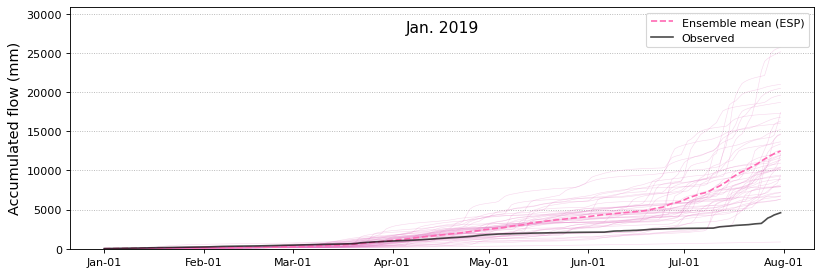

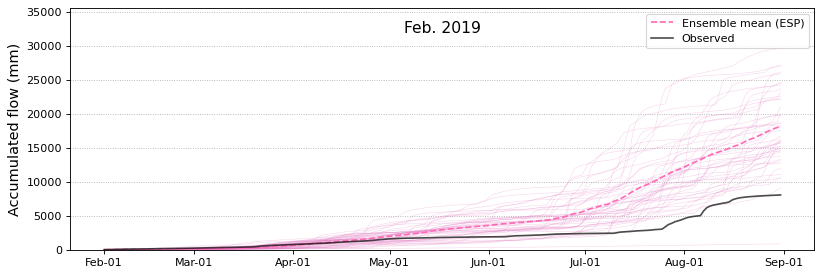

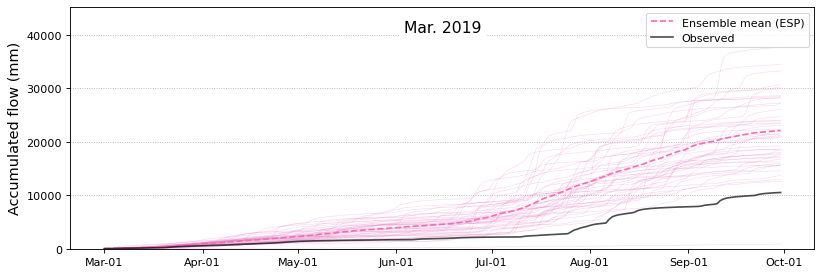

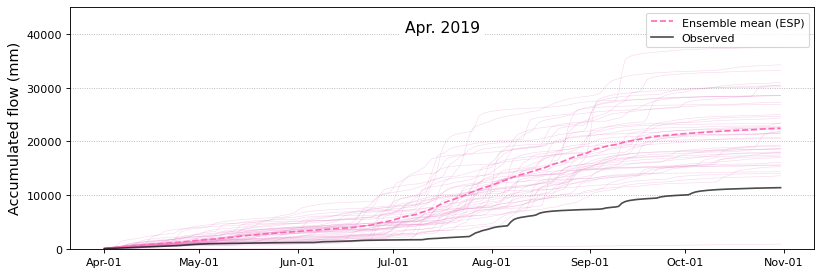

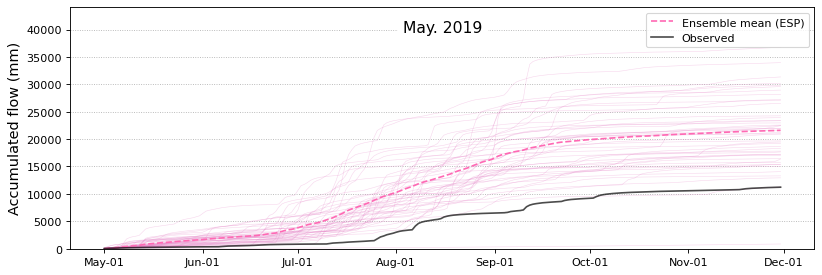

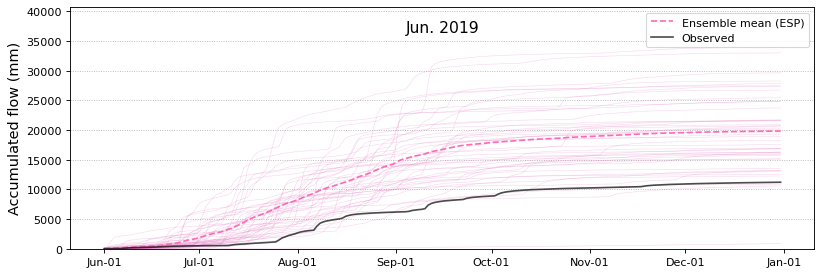

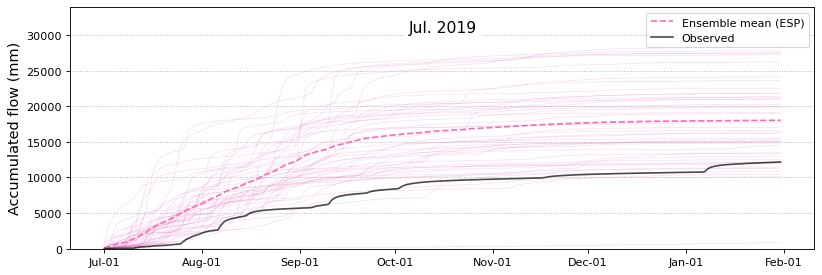

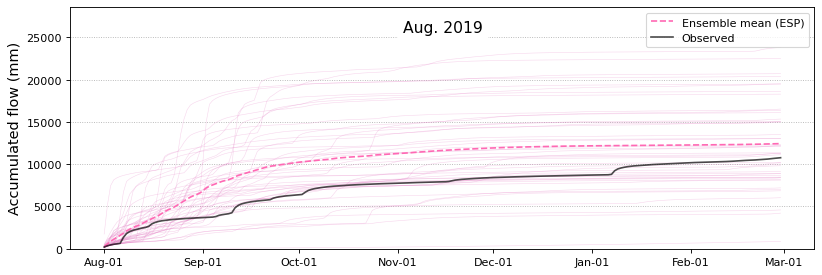

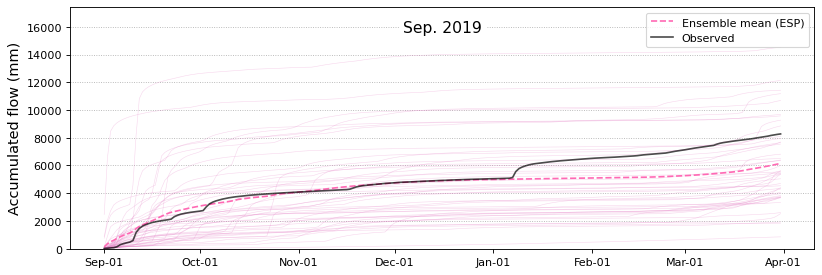

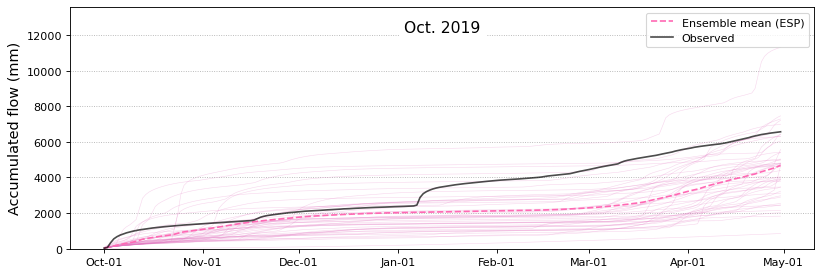

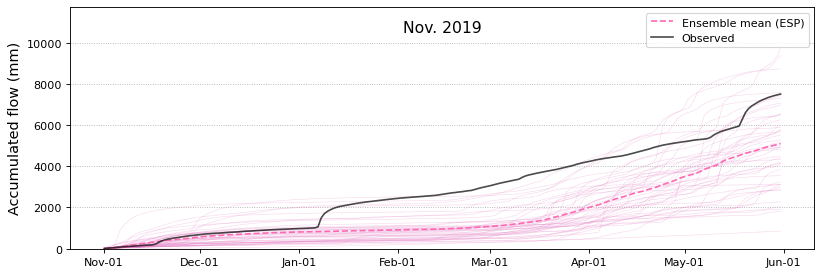

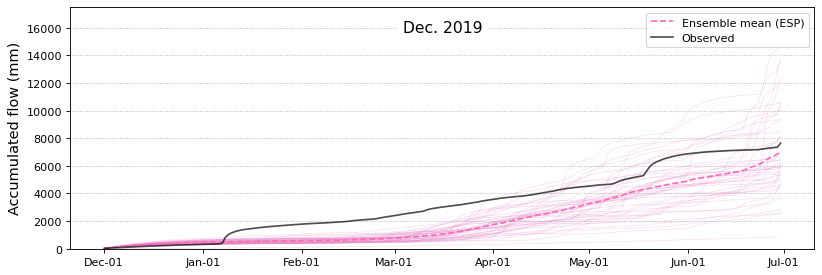

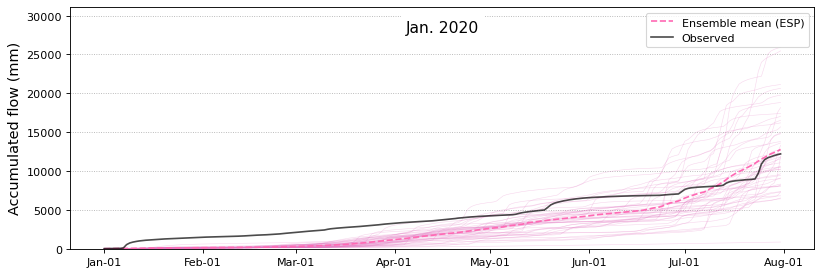

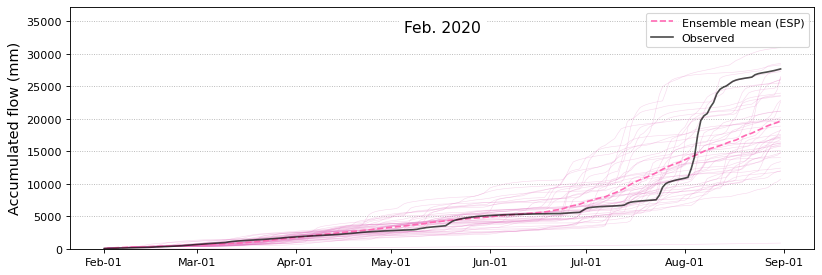

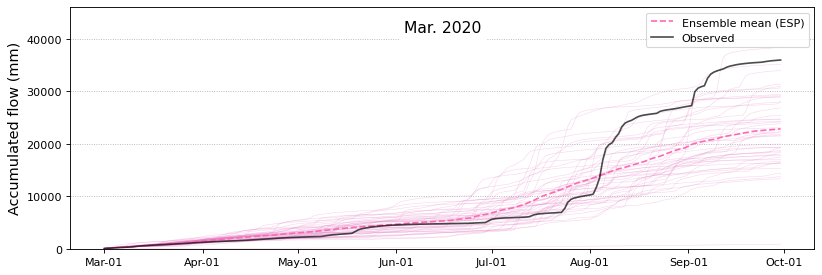

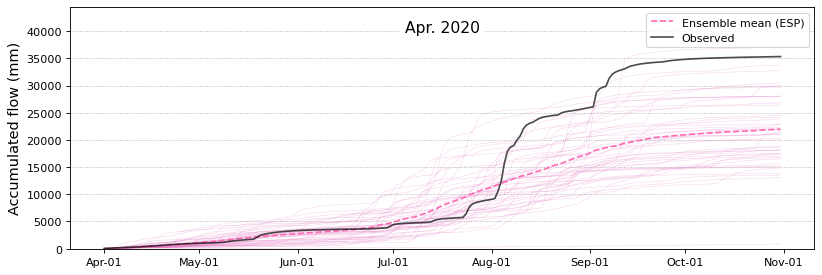

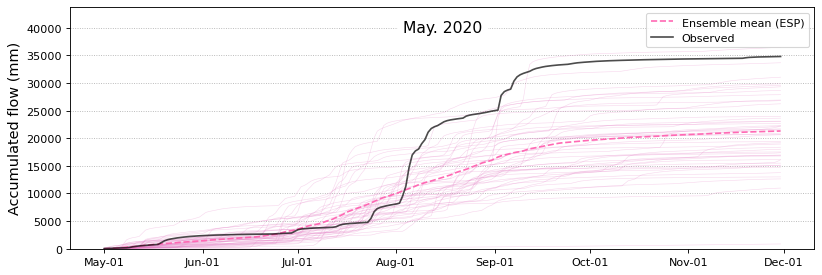

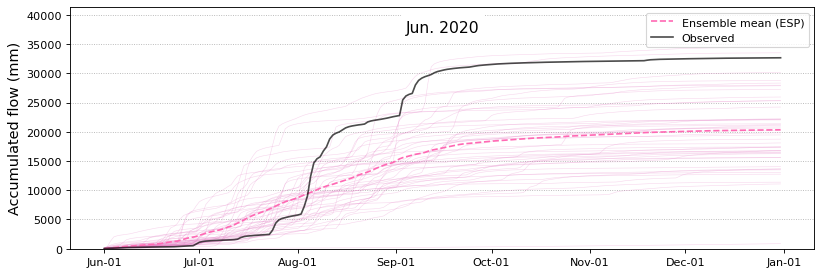

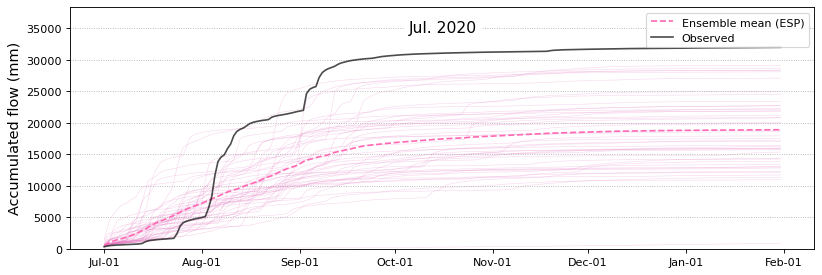

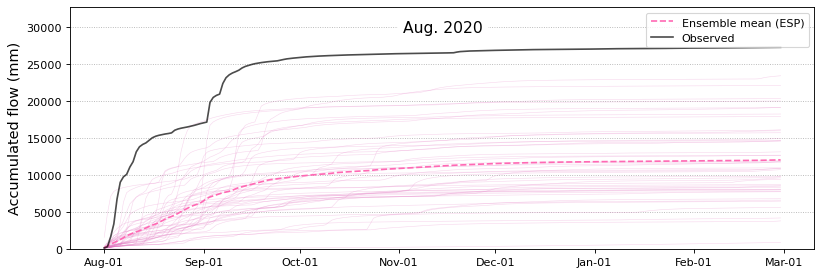

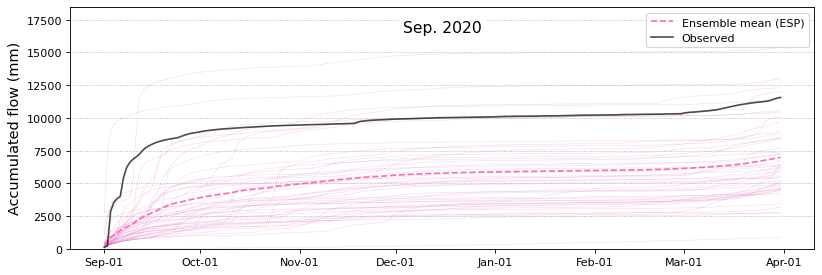

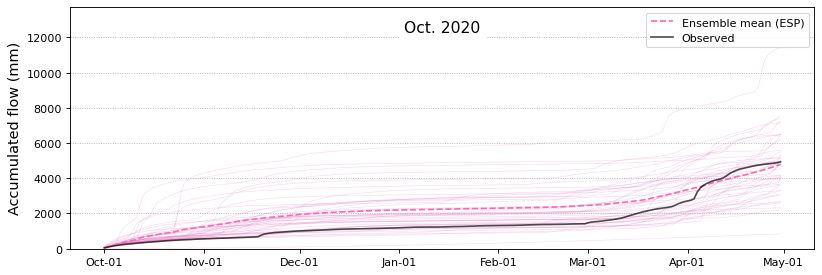

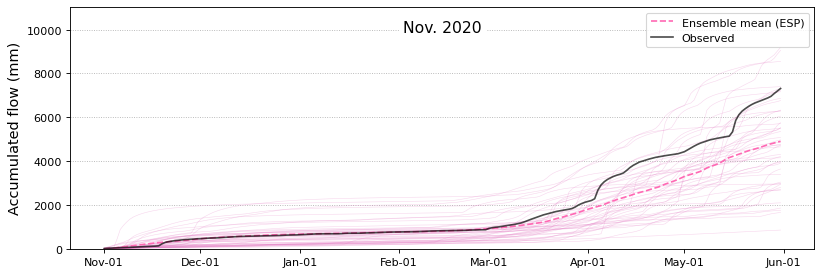

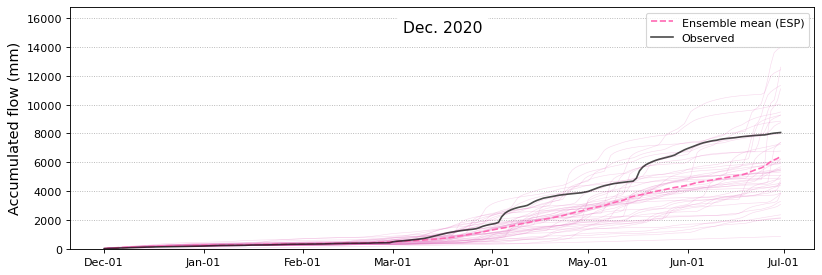

In [40]:
# Define the start and end year to visualise
graph_start_year = 2019
graph_end_year   = 2020

# Loop through each year in the specified range
for years in range(graph_start_year, graph_end_year + 1):
    
    # Loop through each month in the specified range
    for months in range(start_month, end_month + 1):
        
        # Import Data
        df = pd.read_csv(path + '/analysis/3.ESP/3_run/' + '[out]' + catchment_name +  '_' + str(years) +  '_' 
                        + str(months).zfill(2) + '.csv')
        df['date'] = pd.to_datetime(df['date'], infer_datetime_format=True, format='%m/%d/%Y', errors='ignore')

        # Define the upper limit, lower limit, interval of Y axis and colors
        y_LL = 0                                                # y-axis lower limit
        y_UL = int(np.cumsum(df.iloc[:, 1:]).max().max() * 1.2)   # y-axis upper limit, rounded to the nearest thousand
        
        # Draw Plot and Annotate
        fig, ax = plt.subplots(1, 1, figsize=(12, 4), dpi=80)    

        columns = df.columns[1:]                                # Get all columns except 'date'
        num_columns = len(df.columns) - 1                       # Number of forecast ensemble members (excluding 'date', 'mean', and 'obs')
        mycolors = ['tab:pink'] * num_columns                   # List of colors for each ensemble member, initially set to 'tab:pink'
                    
        # Plot each forecast ensemble member's cumulative sum
        for i, column in enumerate(columns[:-2]):
            plt.plot(df.date.values, np.cumsum(df[column].values), lw=0.5, color=mycolors[i], alpha=0.3)
        
        # Plot the ensemble mean (ESP) with a dashed line in hotpink
        plt.plot(df.date.values, np.cumsum(df['mean'].values), lw=1.5, ls='--', color='hotpink', alpha=1, label='Ensemble mean (ESP)')
        
        # Plot the observed flow with a solid black line
        plt.plot(df.date.values, np.cumsum(df['obs'].values), lw=1.5, color='black', alpha=0.7, label='Observed')

        # Decorations    
        plt.tick_params(axis="both", which="both", bottom=True, top=False, left=True, right=False, 
                        labelbottom=True, labelleft=True, length=4)  # Set tick parameters
        
        plt.grid(True, axis='y', linestyle=':')  # Add grid lines for y-axis

        dateFmt = mdates.DateFormatter('%b-%d')   # Define date format
        ax.xaxis.set_major_formatter(dateFmt)     # Set date format for x-axis
        
        # Title format including month abbreviation and year
        plt.title(calendar.month_abbr[months] + '. ' + str(years), x=0.5, y=0.87, fontsize=14, backgroundcolor='white')
        
        # Set y-axis labels
        plt.ylabel('Accumulated flow (mm)', fontsize=13)  # Label for y-axis

        plt.legend()  # Display legend
        plt.ylim(y_LL, y_UL)  # Set y-axis limits
        
        plt.show()  # Display the plot